In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)

In [2]:
health_df = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/health_lifestyle_classification.csv")
health_df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [3]:
data_info_df = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/data info - Sayfa1.csv")
data_info_df.head()

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
0,alcohol_consumption,100000,42387,0.42387,object,[nan 'Regularly' 'Occasionally'],3,-,-,Ordinal
1,caffeine_intake,100000,33261,0.33261,object,['Moderate' 'High' nan],3,-,-,Ordinal
2,exercise_type,100000,24969,0.24969,object,['Strength' 'Cardio' 'Mixed' nan],4,-,-,Nominal
3,insulin,100000,15836,0.15836,float64,[ nan 10.13159744 18.73317943 ... 17.80...,84165,35.46475,-6.79448,Continuous-Ratio
4,heart_rate,100000,14003,0.14003,float64,[60.74982467 66.46369626 76.04321196 ... 56.33...,85998,114.13604,34.74509,Continuous-Ratio


## Drop highly correlated columns

In [4]:
hcc = ["bmi_estimated","bmi_scaled","bmi_corrected"]
if all(col in health_df.columns for col in hcc):
    health_df = health_df.drop(columns=hcc) # main df changed
    print("Dropped specified columns.")
else:
    print("Not all specified columns were present.")
print(health_df.columns)

Dropped specified columns.
Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score',
       'daily_supplement_dosage', 'target'],
      dtype='object')


## Drop Single value columns

In [5]:
columns_to_drop = ["electrolyte_level", "environmental_risk_score"]
if all(col in health_df.columns for col in columns_to_drop):
    health_df = health_df.drop(columns=columns_to_drop) # main df changed
    print("Dropped specified columns.")
else:
    print("Not all specified columns were present.")
print(health_df.columns)

Dropped specified columns.
Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'gene_marker_flag', 'daily_supplement_dosage', 'target'],
      dtype='object')


## Train-Validation-Test split

In [6]:
# bu kısmı atlama
# train valid test için target dengesi lazım
X = health_df.drop(columns="target")
y = health_df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (80000, 42)
X_test: (20000, 42)
y_train: (80000,)
y_test: (20000,)


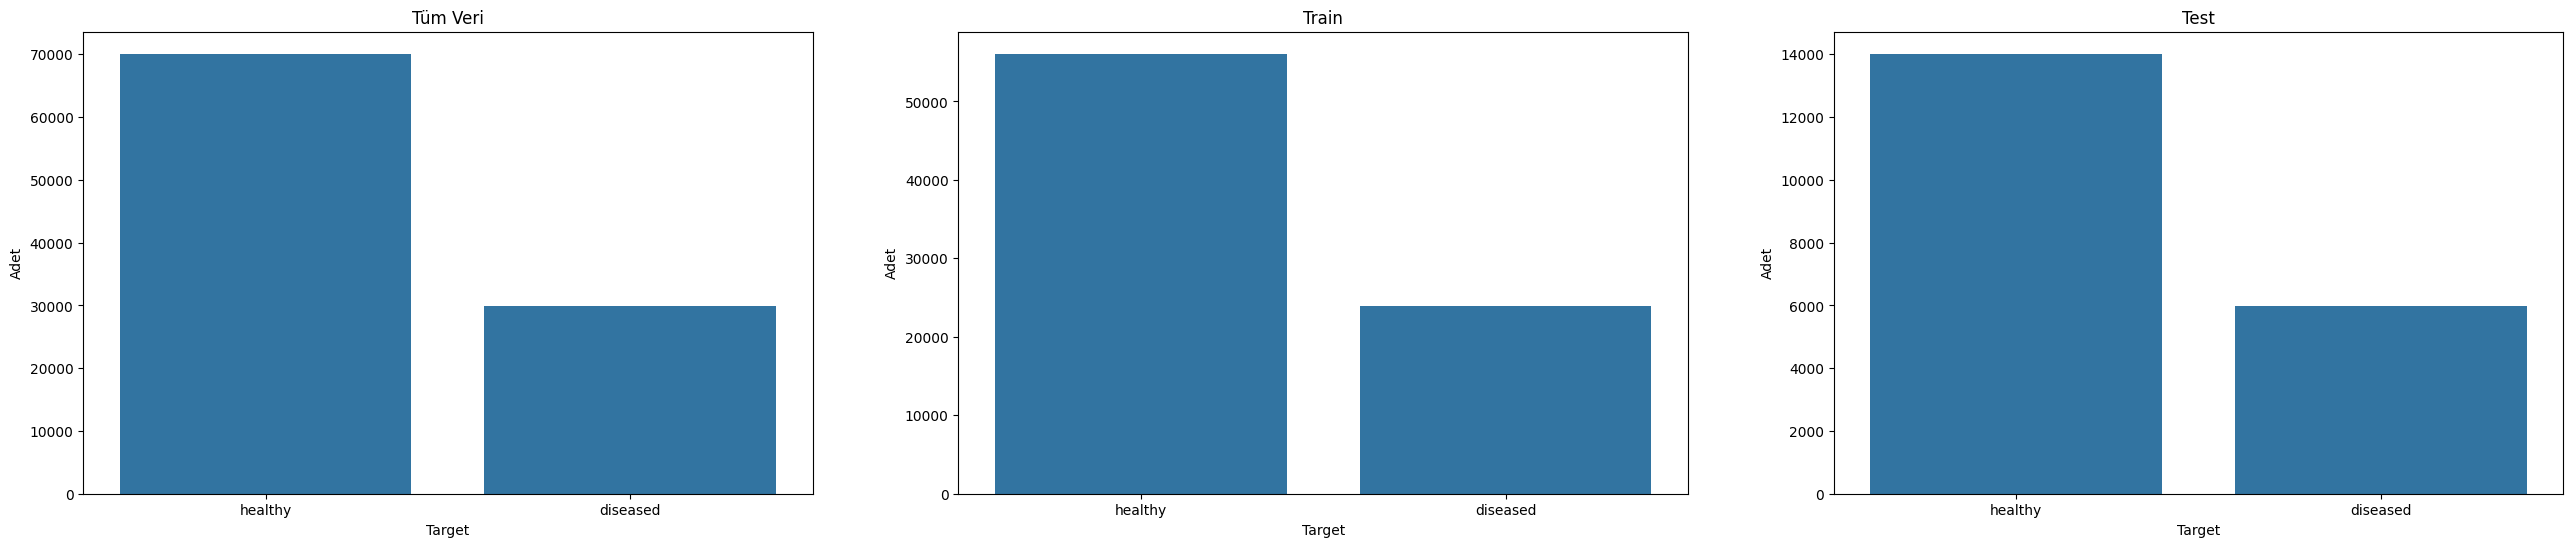

In [7]:
# count gösterimi
fig, axs = plt.subplots(1, 3, figsize=(32, 6))

datasets = [y, y_train, y_test]
titles = ["Tüm Veri", "Train", "Test"]

for ax, data, title in zip(axs, datasets, titles):
    sns.countplot(x=data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Target")
    ax.set_ylabel("Adet")

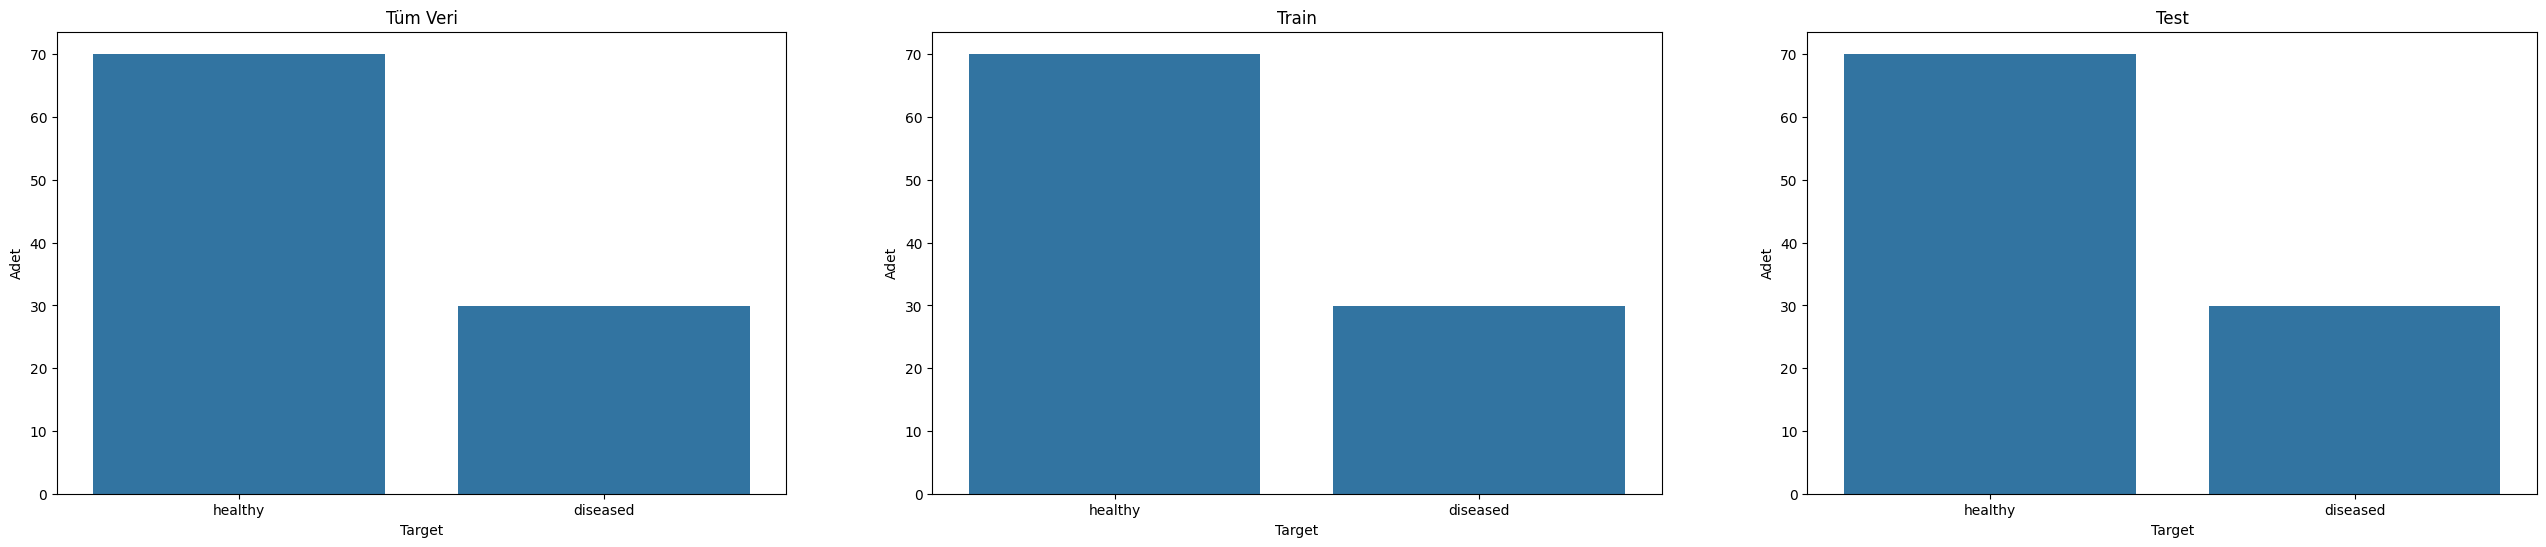

In [8]:
# yüzde gösterimi
fig, axs = plt.subplots(1, 3, figsize=(32, 6))

datasets = [y, y_train, y_test]
titles = ["Tüm Veri", "Train", "Test"]

for ax, data, title in zip(axs, datasets, titles):
    sns.countplot(x=data, ax=ax, stat="percent")
    ax.set_title(title)
    ax.set_xlabel("Target")
    ax.set_ylabel("Adet")

## Filling null values

In [9]:
data_info_df[data_info_df["Missing Value"]!=0]
# boş değerler varken nasıl lineer regresyon yapayım?

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
0,alcohol_consumption,100000,42387,0.42387,object,[nan 'Regularly' 'Occasionally'],3,-,-,Ordinal
1,caffeine_intake,100000,33261,0.33261,object,['Moderate' 'High' nan],3,-,-,Ordinal
2,exercise_type,100000,24969,0.24969,object,['Strength' 'Cardio' 'Mixed' nan],4,-,-,Nominal
3,insulin,100000,15836,0.15836,float64,[ nan 10.13159744 18.73317943 ... 17.80...,84165,35.46475,-6.79448,Continuous-Ratio
4,heart_rate,100000,14003,0.14003,float64,[60.74982467 66.46369626 76.04321196 ... 56.33...,85998,114.13604,34.74509,Continuous-Ratio
5,gene_marker_flag,100000,10474,0.10474,float64,[ 1. nan],2,1.0,1.0,Nominal
6,income,100000,8470,0.08470,float64,[6759.82171934 6240.51768988 3429.17926628 ......,87873,12029.40935,500.0,Continuous-Ratio
7,daily_steps,100000,8329,0.08329,float64,[13320.94259457 11911.201401 2974.03537534 ...,90935,18064.96954,1000.0,Continuous-Ratio
8,blood_pressure,100000,7669,0.07669,float64,[118.26425414 117.91798577 123.0736977 ... 14...,92332,184.4392,59.12817,Continuous-Ratio


In [10]:
missing_cols = data_info_df[data_info_df["Missing Value"]!=0]["Variable"].to_list()
missing_cols.reverse()
print(missing_cols)

['blood_pressure', 'daily_steps', 'income', 'gene_marker_flag', 'heart_rate', 'insulin', 'exercise_type', 'caffeine_intake', 'alcohol_consumption']


In [11]:
ordinals = data_info_df[(data_info_df["Data Type"] == "object") & (data_info_df["Variable Structure"] == "Ordinal")]["Variable"].tolist()
nominals = data_info_df[(data_info_df["Data Type"] == "object") & (data_info_df["Variable Structure"] == "Nominal")]["Variable"].tolist()
print("Ordinals:\n",ordinals)
print("Nominals:\n",nominals)

Ordinals:
 ['alcohol_consumption', 'caffeine_intake', 'sleep_quality', 'smoking_level', 'education_level', 'healthcare_access', 'device_usage', 'sunlight_exposure']
Nominals:
 ['exercise_type', 'gender', 'occupation', 'job_type', 'mental_health_support', 'insurance', 'diet_type', 'pet_owner', 'family_history', 'target']


# Filling İşlem

## Encoding Fonksiyonu

In [12]:
def encode(df, excluded_col):
    for col in df.columns:
        if col in ordinals:
            df[col] = df[col].map(ordinals_map[col])
            if col == excluded_col:
                continue
            df[col] = df[col].fillna(df[col].mode()[0])
        elif col in nominals:
            if col == excluded_col:
                continue
            df[col] = df[col].fillna("Unknown")
        else:
            if col == excluded_col:
                continue
            df[col] = df[col].fillna(df[col].mean())
    df = pd.get_dummies(df, columns=nominals, drop_first=True)
    return df

ordinals_map = {
    "alcohol_consumption":{"Occasionally":0,"Regularly":1},
    "caffeine_intake":{"Moderate":0, "High":1},
    "sleep_quality":{'Poor' : 0,'Fair':1,'Good':2,'Excellent':3},
    "smoking_level":{'Non-smoker':0,'Light':1,'Heavy':2},
    "education_level":{'High School':0,'Bachelor':1,'Master':2,'PhD':3},
    "healthcare_access":{'Poor':0,'Moderate':1,'Good':2},
    "device_usage":{'Low':0,'Moderate':1,'High':2},
    "sunlight_exposure":{'Low':0,'Moderate':1,'High':2},
}

In [15]:
X_train_copy = X_train.copy()
X_train_copy["target"] = y_train

In [16]:
for col in ['blood_pressure', 'daily_steps', 'income','heart_rate','insulin']:
  print("-"*5,col,"-"*5)
  encoded_df = encode(X_train_copy.copy(),col)
  encoded_Train = encoded_df[encoded_df[col].notna()]
  encoded_X_train = encoded_Train.drop(columns=col)
  encoded_y_train = encoded_Train[col]
  encoded_Test = encoded_df[encoded_df[col].isna()]
  encoded_X_test = encoded_Test.drop(columns=col)
  model = LinearRegression()
  model.fit(encoded_X_train,encoded_y_train)
  print("devam")
  y_pred = model.predict(encoded_X_test)
  X_train_copy.loc[X_train_copy[col].isna(), col] = y_pred

----- blood_pressure -----
devam
----- daily_steps -----
devam
----- income -----
devam
----- heart_rate -----
devam
----- insulin -----
devam


In [23]:
X_train_copy.isna().sum().sort_values(ascending=False).head(10)

,0
alcohol_consumption,33801
caffeine_intake,26587
exercise_type,19944
gene_marker_flag,8427
weight,0
bmi,0
waist_size,0
height,0
survey_code,0
age,0


## Gene Marker Flag: Seems like i will get rid of it because it only has a single value; but for now, lets impute that also

In [24]:
X_train_copy["gene_marker_flag"] = X_train_copy["gene_marker_flag"].fillna(X_train_copy["gene_marker_flag"].mean())

In [25]:
X_train_copy.isna().sum().sort_values(ascending=False).head(10)

,0
alcohol_consumption,33801
caffeine_intake,26587
exercise_type,19944
height,0
weight,0
bmi,0
waist_size,0
blood_pressure,0
survey_code,0
age,0
